## RLC Network Response

In [1]:
try:
    import lcapy
except ModuleNotFoundError:
    print("Could not find lcapy - installing")
    !sudo apt install texlive-latex-recommended # takes about 30 sec
    !sudo apt-get install texlive-latex-extra --no-install-recommends # 10 sec
    !sudo apt install imagemagick # 10 sec
    !pip install sympy==1.10.1
    !pip install lcapy # takes 5 sec
    !pip install pdflatex # takes about 5 sec
    import os
    os._exit(00) # restart network

from lcapy import Circuit, j, omega, s, exp
from lcapy import R, C, L

import numpy as np
from numpy import logspace, exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

%matplotlib inline

 # Voltage at nodes 2,3 is initially pinned at 5V and then that voltage is removed at time 0. 
 
 * Thus capacitor initially at 5V.

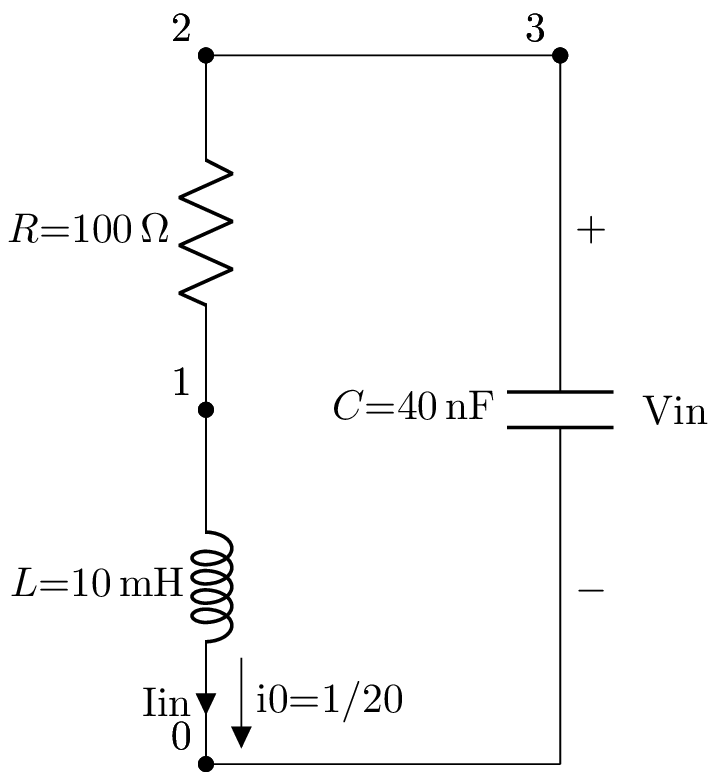

Initial inductor current =   1/20 A


In [2]:
# Set some parameters 
Vin = 5
RR = 100 # resistor
CC = 40e-9 # capacitor value
LL = 10e-3 # inductor value

cct7 = Circuit("""
L 1 0 L {Iin}; down=1.5, i = Iin
R 2 1 R ; down=1.5
W 2 3; right=1.5
C 3 0_3 C Vin; down=1.5, v = Vin
W 0 0_3; right""")

cct7a = cct7.subs({'Vin':5, 'R': RR, 'C':CC, 'L':LL, 'Iin':Vin/RR})

cct7a.draw()

# resulting from the initial built up capacitor voltage will be a current through the inductor
print('Initial inductor current =  ',cct7a.L.i(0),'A')

In [3]:
wn = 1/np.sqrt(LL*CC)
zeta = RR/LL/2/wn
wd = wn*np.sqrt(1-zeta**2)
print(f"\tFrequency \t= {wn:.1f} rad/sec")
print(f"\tDamped Freq \t= {wd:.1f} rad/sec")
print(f"\tDamping ratio \t= {(zeta):.2f}")
print(f"\tReal part \t= {(-zeta*wn):.1f}") 

	Frequency 	= 50000.0 rad/sec
	Damped Freq 	= 49749.4 rad/sec
	Damping ratio 	= 0.10
	Real part 	= -5000.0


# Compute time response

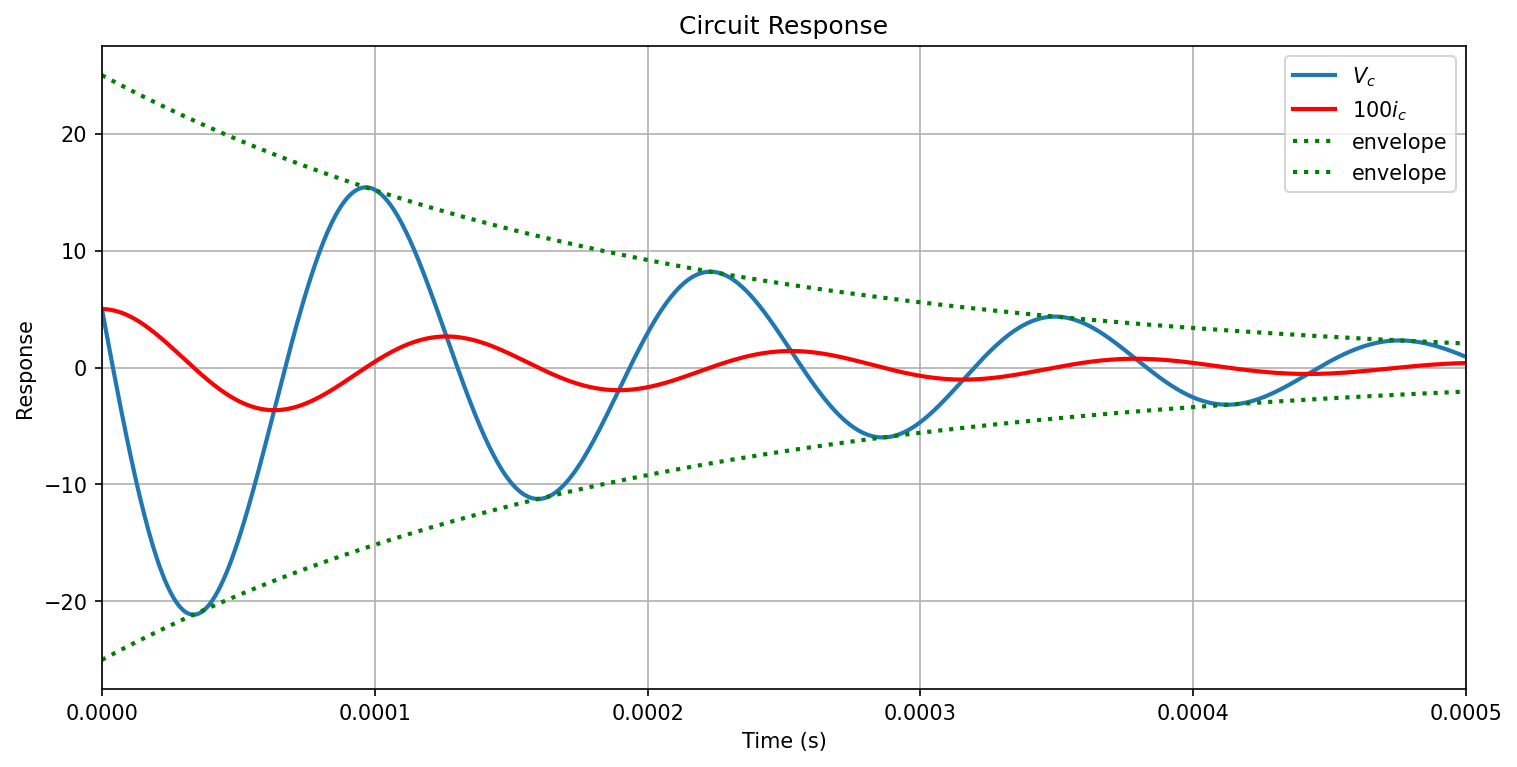

In [4]:
t = np.linspace(0, 5e-4, 1000)
vr = cct7a.C.v.evaluate(t) # capacitor voltage
vi = 100*cct7a.L.i.evaluate(t) # scaled up inductor current

fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vr, linewidth=2, label='$V_c$')
ax.plot(t, vi, linewidth=2, color='red', label='100$i_c$')
ax.plot(t, 25*exp(-t*wn*zeta), 'g:', linewidth=2, label='envelope')
ax.plot(t, -25*exp(-t*wn*zeta), 'g:', linewidth=2, label='envelope')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
ax.grid()
ax.set_xlim(0,0.0005)
plt.legend()
plt.show()

**Note:** Very large voltage fluctations that occur in the capacitor and the very short time scales involved